In [1]:
conda install -c conda-forge keras

Note: you may need to restart the kernel to use updated packages.
Solving environment: ...working... done

# All requested packages already installed.




In [2]:
pip install tensorflow

You should consider upgrading via the 'C:\Users\Kedar-PC\anaconda3\python.exe -m pip install --upgrade pip' command.


In [3]:
import keras

In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
dataset=pd.read_csv("C:\\Users\\Kedar-PC\\Desktop\\Dataset\\Churn_Modelling.csv")

In [6]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
x=dataset.iloc[:,3:13]

In [9]:
y=dataset.iloc[:,13]

In [10]:
geography=pd.get_dummies(x['Geography'],drop_first=True)
gender=pd.get_dummies(x['Gender'],drop_first=True)


In [11]:
x=pd.concat([x,geography,gender],axis=True)

In [13]:
x=x.drop(['Geography','Gender'],axis=True)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12)

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
sc=StandardScaler()

In [18]:
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [23]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU

In [24]:
from keras.layers import Dropout

In [25]:
classifier=Sequential()

In [46]:
classifier.add(Dense(units=7,kernel_initializer='he_uniform',activation='relu',input_dim=11))


In [47]:
classifier.add(Dense(units=5,kernel_initializer='he_normal',activation='relu',input_dim=7))


In [48]:
classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid',input_dim=5))


In [49]:
classifier.compile(optimizer='Adamax',loss='binary_crossentropy',metrics=['accuracy'])

In [50]:
model_history=classifier.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=100)

Epoch 1/100
536/536 [==============================] - 3s 3ms/step - loss: 0.6309 - accuracy: 0.7500 - val_loss: 0.5497 - val_accuracy: 0.8622
Epoch 2/100
536/536 [==============================] - 1s 3ms/step - loss: 0.5180 - accuracy: 0.8283 - val_loss: 0.4692 - val_accuracy: 0.8277
Epoch 3/100
536/536 [==============================] - 1s 3ms/step - loss: 0.4681 - accuracy: 0.8209 - val_loss: 0.4292 - val_accuracy: 0.8114
Epoch 4/100
536/536 [==============================] - 1s 3ms/step - loss: 0.4381 - accuracy: 0.8324 - val_loss: 0.4064 - val_accuracy: 0.8285
Epoch 5/100
536/536 [==============================] - 1s 3ms/step - loss: 0.4308 - accuracy: 0.8263 - val_loss: 0.3943 - val_accuracy: 0.8432
Epoch 6/100
536/536 [==============================] - 1s 3ms/step - loss: 0.4272 - accuracy: 0.8268 - val_loss: 0.3926 - val_accuracy: 0.8319
Epoch 7/100
536/536 [==============================] - 1s 3ms/step - loss: 0.4243 - accuracy: 0.8274 - val_loss: 0.3887 - val_accuracy: 0.8360

In [51]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


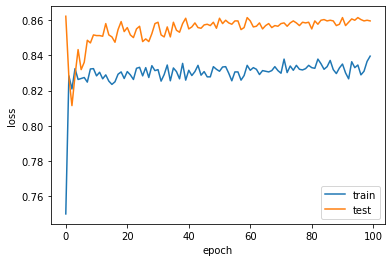

In [53]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'],loc='lower right')